In [1]:
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from coffea import hist, processor
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt

In [2]:
filename = "/pnfs/psi.ch/cms/trivcat/store/user/mmarcheg/BTVNanoCommissioning/store/user/mmarcheg/PFNano/BTagMu/Run2016B-ver2_HIPM_UL2016_MiniAODv2-v1_v01/220311_144252/0000/nano_data2016_518.root"
events = NanoEventsFactory.from_root(filename, schemaclass=NanoAODSchema).events()
print("nEvents=", len(events))

/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/nanoevents/mapping/uproot.py:75: UserWarning: Found duplicate branch FatJet_btagDDBvLV2 in <TTree 'Events' (1413 branches) at 0x7f5f740a9190>, taking first instance
  warnings.warn(
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/nanoevents/mapping/uproot.py:75: UserWarning: Found duplicate branch FatJet_btagDDCvBV2 in <TTree 'Events' (1413 branches) at 0x7f5f740a9190>, taking first instance
  warnings.warn(
/work/mmarcheg/miniconda3/envs/coffea/lib/python3.9/site-packages/coffea/nanoevents/mapping/uproot.py:75: UserWarning: Found duplicate branch FatJet_btagDDCvLV2 in <TTree 'Events' (1413 branches) at 0x7f5f740a9190>, taking first instance
  warnings.warn(


In [3]:
events = events[ak.num(events.FatJet, axis=1) >= 1]

In [4]:
events.SV.pt

<Array [[0.66, 0.726], ... [0.147, 1.42]] type='6 * var * float32'>

In [5]:
i_maxPt = ak.argsort(events.SV.pt, ascending=False)
i_maxdxySig = ak.argsort(events.SV.dxySig, ascending=False)
events.SV[i_maxPt].pt

<Array [[0.726, 0.66], ... [1.42, 0.147]] type='6 * var * float32'>

In [6]:
def get_sv_in_jet(jet, sv, R=0.8):

    sv_dr = jet.delta_r(sv)
    sv_in_jet = sv_dr < R

    return sv_in_jet

In [7]:
leadfatjet = ak.firsts(events.FatJet)

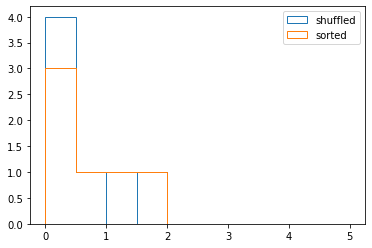

In [8]:
plt.hist(ak.firsts(events.SV.pt), bins=np.linspace(0,5,11), histtype='step', label='shuffled')
plt.hist(ak.firsts(events.SV[i_maxPt].pt), bins=np.linspace(0,5,11), histtype='step', label='sorted')
plt.legend();

In [9]:
sv = events.SV[get_sv_in_jet(leadfatjet, events.SV)]
sv.pt

<Array [[], [], [], [], [], []] type='6 * option[var * float32]'>

In [10]:
ak.count(events.FatJet.subjets.pt, axis=2)

<Array [[2, 0], [2], [0], ... 2], [0], [2, 2]] type='6 * var * int64'>

In [11]:
i_maxPt = ak.argsort(sv.pt, ascending=False)
i_maxPt

<Array [[], [], [], [], [], []] type='6 * option[var * int64]'>

In [12]:
sv[i_maxPt].pt

<Array [[], [], [], [], [], []] type='6 * option[var * float32]'>

In [13]:
ak.flatten(sv[i_maxPt].pt)

<Array [] type='0 * float32'>

In [14]:
x = ak.Array([[13.1, 2.56], [56.8, 7.5, 9]])
ak.type(i_maxPt)
ak.type(x)

2 * var * float64

In [15]:
zeros = ak.zeros_like(x, dtype=float)
x[ak.zeros_like(zeros, dtype=bool)]

<Array [[], []] type='2 * var * float64'>

In [16]:
y = ak.Array([[13.2, 14], [67.8]])
y

<Array [[13.2, 14], [67.8]] type='2 * var * float64'>

In [17]:
ak.pad_none(y,2)

<Array [[13.2, 14], [67.8, None]] type='2 * var * ?float64'>

In [18]:
z = ak.mask(y, ak.is_none(y))
z

<Array [None, None] type='2 * option[var * float64]'>

In [19]:
y[z]

ValueError: only arrays of integers or booleans may be used as a slice

(https://github.com/scikit-hep/awkward-1.0/blob/1.8.0/src/libawkward/array/NumpyArray.cpp#L3126)

In [20]:
ak.mask(y, z)

ValueError: mask must have boolean type, not dtype('float64')

(https://github.com/scikit-hep/awkward-1.0/blob/1.8.0/src/awkward/operations/structure.py#L156)

In [22]:
ak.mask(y, ~ak.is_none(z))

<Array [None, None] type='2 * option[var * float64]'>

In [23]:
z

<Array [None, None] type='2 * option[var * float64]'>

In [24]:
ak.argsort(z, ascending=False)

<Array [None, None] type='2 * option[var * float64]'>

In [25]:
ak.argsort(y, ascending=False)

<Array [[1, 0], [0]] type='2 * var * int64'>

In [26]:
ak.argsort(y[y>100])

<Array [[], []] type='2 * var * int64'>

In [27]:
y[[None, None]]

<Array [None, None] type='2 * option[var * float64]'>

In [28]:
ak.argsort(z)

<Array [None, None] type='2 * option[var * float64]'>

In [29]:
ak.flatten(z)

<Array [] type='0 * float64'>

In [32]:
events.Jet.pt

<Array [[230, 180, 81.6, ... 42.9, 30.8, 18.2]] type='6 * var * float32[paramete...'>